## HW3: Decision Tree, AdaBoost and Random Forest
In hw3, you need to implement decision tree, adaboost and random forest by using only numpy, then train your implemented model by the provided dataset. TA will use the on-hold test label to evaluate your model performance.

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling `sklearn.tree.DecisionTreeClassifier`

## Question 1
Gini Index or Entropy is often used for measuring the “best” splitting of the data. Please compute the Entropy and Gini Index of provided data. Please use the formula from [page 5 of hw3 slides](https://docs.google.com/presentation/d/1kIe_-YZdemRMmr_3xDy-l0OS2EcLgDH7Uan14tlU5KE/edit#slide=id.gd542a5ff75_0_15)

In [8]:
# Copy and paste your implementations right here to check your result
# (Of course you can add your classes not written here)
import numpy as np

# sequence: multiple rows
def gini(sequence): 
    s = len(sequence) # seq's length
    cls = np.unique(sequence) # class in seq
    cls_dict = dict() # store class with corresponding amount
    for item in sequence:
        if(item in cls_dict):
            cls_dict[ item ] += 1
        else:
            cls_dict[item] = 1
    g = 1
    for c in cls: # for each class
        p = cls_dict[c]/s # probability of being the class
        g -= pow(p,2) # gini -= p^2
    return g


def entropy(sequence):
    s = len(sequence) # seq's length
    cls = np.unique(sequence) # class in seq
    cls_dict = dict() # store class with corresponding amount
    for item in sequence:
        if(item in cls_dict):
            cls_dict[ item ] += 1
        else:
            cls_dict[item] = 1
    e = 0
    for c in cls: # for each class
        p = cls_dict[c]/s # probability of being the class
        e -= p*np.log2(p) # entropy -= p*log2(p)
    return e

In [9]:
# 1 = class 1,
# 2 = class 2
data = np.array([1,2,1,1,1,1,2,2,1,1,2])

In [10]:
print("Gini of data is ", gini(data))

Gini of data is  0.4628099173553719


In [11]:
print("Entropy of data is ", entropy(data))

Entropy of data is  0.9456603046006401


## Load data
It is a binary classifiation dataset that classify if price is high or not for a cell phone, the label is stored in `price_range` column.

In [13]:
import pandas as pd

train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')
print(train_df.shape)
print(val_df.shape)

train_df.head()

(1200, 21)
(300, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1583,1,2.1,1,11,0,14,0.7,148,7,...,942,1651,1704,17,13,2,1,0,1,1
1,745,1,0.6,1,5,0,35,0.8,102,8,...,89,1538,2459,14,1,16,1,1,0,0
2,832,0,0.7,1,2,1,39,0.7,103,4,...,125,1504,1799,5,2,11,1,0,1,0
3,1175,1,1.3,0,2,0,19,0.3,164,7,...,873,1394,1944,9,4,9,1,1,0,0
4,695,0,0.5,0,18,1,12,0.6,196,2,...,1649,1829,2855,16,13,7,1,1,1,1


## Question 2
Implement the Decision Tree algorithm (CART, Classification and Regression Trees) and trained the model by the given arguments, and print the accuracy score on the validation data. You should implement two arguments for the Decision Tree algorithm
1. **criterion**: The function to measure the quality of a split. Your model should support `gini` for the Gini impurity and `entropy` for the information gain. 
2. **max_depth**: The maximum depth of the tree. If `max_depth=None`, then nodes are expanded until all leaves are pure. `max_depth=1` equals to split data once


In [6]:
def to_nparray(input_df): # change dataframe to nparray
    x = input_df.drop(labels=["price_range"], axis="columns")
    x = x.values
    y = input_df['price_range'].values
    
    return x, y

In [14]:

def g_or_e(sequence, criterion): #perform gini or entropy base on criterion
    if(criterion=='gini'):
        return gini(sequence)
    else:
        return entropy(sequence)

def compute(t_cls, f_cls, criterion, cur): # compute infomation gain
    prob_t = len(t_cls)/ (len(f_cls)+len(t_cls) ) #probability of true
    n = g_or_e(t_cls, criterion)*prob_t + g_or_e(f_cls, criterion)*(1-prob_t) #multiply weight
    return cur-n

def tf_generator(x_data, y_data, i, v): # seperate true & false by feature and value
    t = [] 
    f = []
    for row, cls in zip(x_data, y_data):
        if(row[i]>=v): # bool: v=1
            t.append(cls)
        else:
            f.append(cls)
    return t, f

def tf_generator_x(x_data, y_data, i, v): # seperate true & false by feature and value
    tx = [] 
    ty = []
    fx = []
    fy = []
    for row, cls in zip(x_data, y_data):
        if(row[i]>=v): # bool: v=1
            tx.append(row)
            ty.append(cls)
        else:
            fx.append(row)
            fy.append(cls)
    tx = np.array(tx)
    ty = np.array(ty)
    fx = np.array(fx)
    fy = np.array(fy)
    return tx, ty, fx, fy


print(train_df)
x_data, y_data = to_nparray(train_df) # transform data
t_temp, f_temp = tf_generator(x_data, y_data, 1, 1)
print(len(t_temp),len(f_temp))
print(y_data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0              1583     1          2.1         1  11       0          14   
1               745     1          0.6         1   5       0          35   
2               832     0          0.7         1   2       1          39   
3              1175     1          1.3         0   2       0          19   
4               695     0          0.5         0  18       1          12   
...             ...   ...          ...       ...  ..     ...         ...   
1195           1872     1          0.5         1  14       0          49   
1196           1239     0          1.2         1   5       1          52   
1197           1195     1          1.1         1   2       1           8   
1198            671     0          0.9         1  10       0          30   
1199           1845     1          0.5         1  10       0          61   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [15]:
class d_node(): # decision node
    def __init__(self, true, false, split_f):
        self.true = true
        self.false = false
        self.split_f = split_f # split feature and value

class l_node(): #leaf node
    def __init__(self, sequence):
        self.cls_pred = dict() # store class with corresponding amount
        self.cls_pred = {1:0, 0:0}
        for item in sequence:
            if(item in self.cls_pred):
                self.cls_pred[ item ] += 1
            else:
                self.cls_pred[item] = 1

In [17]:

class DecisionTree():
    def __init__(self, criterion='gini', max_depth=None, forest=False):
        self.max_depth = max_depth
        self.criterion = criterion
        self.tree = ' '
        self.y_predict = []
        self.gain = ' '
        self.feature_n_val = ' '
        self.for_ada_y_data = ' '
        self.feature_pool_index = []
        self.feature_pool = []
        self.forest = forest
        self.importance = np.zeros(20)
        pass
    
    def pool(self, x_data, y_data): # all feature of data
        for i in range(len(x_data[0]-1)):
            v_of_feature_i = np.unique(x_data[:, i])
            if(len(v_of_feature_i)==2): #bool
                t, f = tf_generator(x_data, y_data, i, 1)
                if(len(t)!=0 and len(f)!=0):
                    self.feature_pool.append([i, 1])
            else: #numeric
                for v in v_of_feature_i:
                    t, f = tf_generator(x_data, y_data, i, v)
                    if(len(t)!=0 and len(f)!=0):
                        self.feature_pool.append([i, v])
        return len(self.feature_pool)

    def split(self, x_data, y_data, criterion): # find best split with best infomation gain
        best_gain = 0
        best_feature_n_val = [] # store feature ol, val(bool=1)
        cur = g_or_e(y_data, criterion) 
        count = 0 # index of feature
        for i in range(len(x_data[0]-1)): # loop all features
            v_of_feature_i = np.unique(x_data[:, i])
            flag = True
            if(len(v_of_feature_i)==2): #bool
                
                if(self.forest == True):
                    if(count  not in self.feature_pool_index):
                        flag = False
                if(flag == True):
                    t, f = tf_generator(x_data, y_data, i, 1)
                    if(len(t)!=0 and len(f)!=0):
                        temp_gain = compute(t, f, criterion, cur)
                        if (temp_gain>best_gain):
                            best_gain = temp_gain
                            best_feature_n_val = [i, 1]
                count+=1
            else: #numeric
                for v in v_of_feature_i:
                    if(self.forest == True):
                        if(count not in self.feature_pool_index):
                            flag = False
                    if(flag == True):
                        t, f = tf_generator(x_data, y_data, i, v)
                        if(len(t)!=0 and len(f)!=0):
                            temp_gain = compute(t, f, criterion, cur)
                            if (temp_gain>best_gain):
                                best_gain = temp_gain
                                best_feature_n_val = [i, v]
                    flag = True
                    count+=1
        return best_gain, best_feature_n_val

    def fitting(self, x_data, y_data, depth=0):

        gain, feature_n_val = self.split(x_data, y_data, self.criterion) # find best split by self.split
        self.gain = gain
        self.feature_n_val = feature_n_val
        if (gain==0 or depth==self.max_depth): # max depth or nothing learned
            self.for_ada_y_data = y_data
            return l_node(y_data) #leaf node
        else: #still learning
            tx, ty, fx, fy = tf_generator_x(x_data, y_data, feature_n_val[0], feature_n_val[1])
            true = self.fitting(tx, ty, depth+1) # continue on its child node
            false = self.fitting(fx, fy, depth+1)
        
        if(self.tree == ' '): self.tree = d_node(true, false, feature_n_val)
        return d_node(true, false, feature_n_val) # decision node

    def fit(self, x_data, y_data, depth=0): # fit using fitting
        self.tree = self.fitting( x_data, y_data, depth=0)

    def pred_row(self, row, node): #predict result of row

        if (type(node)==l_node):
            if(node.cls_pred[1]>=node.cls_pred[0]): # l_node class = true
                self.y_predict.append(1)
                return 
            else: # l_node class = false
                self.y_predict.append(0)
                return 

        i = node.split_f[0] # i
        v = node.split_f[1] # v

        if(row[i]>=v): #true
            self.pred_row(row, node.true)
        else: #false
            self.pred_row(row, node.false)

    def pred_row_print(self, row, node): #predict result of row
        if (type(node)==l_node):
            if(node.cls_pred[1]>=node.cls_pred[0]): # l_node class = true
                row_pred = 1
                return row_pred
            else: # l_node class = false
                row_pred = 0
                return row_pred

        i = node.split_f[0] # i
        v = node.split_f[1] # v
        if(row[i]>=v): #true
            self.pred_row(row, node.true)
        else: #false
            self.pred_row(row, node.false)
   
    def predict(self, x_data): # predict 得出 x_data對應的y_pred (可和y_data比對)
        self.y_predict = []
        for row in x_data:
            self.pred_row(row, self.tree)
        self.y_predict = np.array(self.y_predict)
        return self.y_predict 
    
    def show_val_acc(self, pred, y_val):
        false = 0 
        total = len(y_val)
        for p, truth in zip(pred, y_val):
            if(p != truth):
                false+=1
        print("accuracy: ", 1.0-float(false/total))
    
    def return_err(self, pred, y_val): # error between 2 data
        false = 0 
        total = len(y_val)
        for p, truth in zip(pred, y_val):
            if(p != truth):
                false+=1
        return(float(false/total))#float(false/total)
    
    def important(self, node): #importance of feature
        if (type(node)==l_node):
            return
        print (str(node.split_f))
        self.importance[node.split_f[0]] += 1
        self.important(node.true)
        self.important(node.false)
                        
        

#tree = DecisionTree(max_depth=3)
#t = tree.fit(x_data, y_data)
#predict =  tree.predict(x_val)


### Question 2.1
Using `criterion=gini`, showing the accuracy score of validation data by `max_depth=3` and `max_depth=10`, respectively.


In [18]:
x_val, y_val = to_nparray(val_df)

In [ ]:

clf_depth3 = DecisionTree(criterion='gini', max_depth=3)
clf_depth10 = DecisionTree(criterion='gini', max_depth=10)

print("depth = 3: ")
clf_depth3.fit(x_data, y_data)
pred_3 =clf_depth3.predict(x_val)
clf_depth3.show_val_acc(pred_3, y_val)

print('')
print("depth = 10: ")
clf_depth10.fit(x_data, y_data)
pred_10 =clf_depth10.predict(x_val)
clf_depth10.show_val_acc(pred_10, y_val)


depth = 3: 
accuracy:  0.92

depth = 10: 
accuracy:  0.9299999999999999


In [ ]:
clf_depth10.important(clf_depth10.tree)
#print(clf_depth10.importance)

### Question 2.2
Using `max_depth=3`, showing the accuracy score of validation data by `criterion=gini` and `criterion=entropy`, respectively.


In [ ]:
clf_gini = DecisionTree(criterion='gini', max_depth=3)
clf_entropy = DecisionTree(criterion='entropy', max_depth=3)

print("criterion = gini: ")
clf_gini.fit(x_data, y_data)
pred_g =clf_gini.predict(x_val)
clf_gini.show_val_acc(pred_g, y_val)

print('')
print("criterion = entropy: ")
clf_entropy.fit(x_data, y_data)
pred_e =clf_entropy.predict(x_val)
clf_entropy.show_val_acc(pred_e, y_val)

criterion = gini: 
accuracy:  0.92

criterion = entropy: 
accuracy:  0.9333333333333333


- Note: Your decisition tree scores should over **0.9**. It may suffer from overfitting, if so, you can tune the hyperparameter such as `max_depth`
- Note: You should get the same results when re-building the model with the same arguments,  no need to prune the trees
- Hint: You can use the recursive method to build the nodes


## Question 3
Plot the [feature importance](https://sefiks.com/2020/04/06/feature-importance-in-decision-trees/) of your Decision Tree model. You can get the feature importance by counting the feature used for splitting data.

- You can simply plot the **counts of feature used** for building tree without normalize the importance. Take the figure below as example, outlook feature has been used for splitting for almost 50 times. Therefore, it has the largest importance

![image](https://i2.wp.com/sefiks.com/wp-content/uploads/2020/04/c45-fi-results.jpg?w=481&ssl=1)

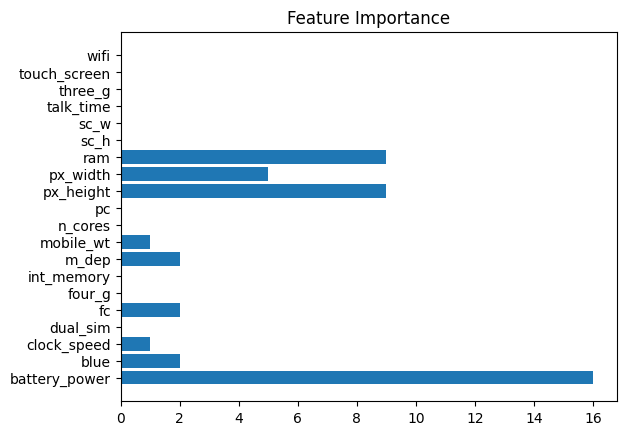

In [ ]:
import matplotlib.pyplot as plt
# plot data
importances = clf_depth10.importance
x_train = train_df.drop(labels=["price_range"], axis="columns")
names = x_train.columns.values

plt.figure()
plt.title("Feature Importance")
plt.barh(range(x_data.shape[1]), importances)

plt.yticks(range(x_data.shape[1]), names, rotation=0)

plt.show()

## Question 4
implement the AdaBooest algorithm by using the CART you just implemented from question 2 as base learner. You should implement one arguments for the AdaBooest.
1. **n_estimators**: The maximum number of estimators at which boosting is terminated

In [19]:
def resample(x_data, y_data, D): #resample by D
    sample_index = np.random.choice(len(y_data), size=len(y_data), replace=True, p=D)
    sample_index.sort()
    x = []
    y = []
    for i in sample_index:
        x.append(x_data[i])
        y.append(y_data[i])
    return x, y

In [20]:
class AdaBoost():
    def __init__(self, n_estimators):
        self.n_estimators = n_estimators 
        self.classifier = []
        self.alphalist = []

    def fit(self, x_data, y_data):
        D = [1/len(x_data)]*len(x_data) # init D
        self.classifier = []
        self.alphalist = []
        for t in range(self.n_estimators): # t round, 600 data 1 time
            x, y = resample(x_data, y_data, D)
            dec_tree = DecisionTree(criterion = 'entropy',max_depth=1)
            x = np.array(x)
            y = np.array(y)
            dec_tree.fit(x, y) 
            self.classifier.append(dec_tree)
            
            # call dec_tree.predict = classify using ht
            p = dec_tree.predict(x_data)
            t_err = dec_tree.return_err(p, y_data)
            alpha = np.log((1-t_err)/t_err)*0.5
            self.alphalist.append(alpha)
            temp_d = []
            if(dec_tree.gain!=0):
                decide = dec_tree.tree.split_f
                for i in range(len(D)):
                    if(x_data[i][decide[0]]>=decide[1]):
                        x_class = 1
                    else:
                        x_class = -1
                    temp_d.append(D[i]*np.exp(-(alpha*y_data[i]* x_class)))
                D = temp_d
                D /= np.sum(D) # normalization
        

    def predict(self, x_data):
        preds = []
        for t in range(self.n_estimators):
            data_pred = self.classifier[t].predict(x_data)
            data_pred = np.array(data_pred)
            preds.append(self.alphalist[t]*data_pred)
        y_prediction = np.sum(preds, axis=0)
        y_prediction = np.sign(y_prediction)
        return y_prediction

    def acc(self, pred, truth):
        false = 0
        total = len(truth)
        for p, t in zip(pred, truth):
            
            if((p==-1 and t==1)or(p==1 and t==0)):
                false +=1
        print("acc: ", 1-float(false/total))






### Question 4.1
Show the accuracy score of validation data by `n_estimators=10` and `n_estimators=100`, respectively.


In [ ]:
ada10 = AdaBoost(n_estimators=10)
ada10.fit(x_data, y_data)
p10 = ada10.predict(x_data)
print("adaboost, n_estimators=10: ")
ada10.acc(p10, y_data)

ada100 = AdaBoost(n_estimators=100)
ada100.fit(x_data, y_data)
p100 = ada10.predict(x_data)
print("adaboost, n_estimators=100: ")
ada100.acc(p100, y_data)

adaboost, n_estimators=10: 
acc:  0.8591666666666666
adaboost, n_estimators=100: 
acc:  0.8591666666666666


## Question 5
implement the Random Forest algorithm by using the CART you just implemented from question 2. You should implement three arguments for the Random Forest.

1. **n_estimators**: The number of trees in the forest. 
2. **max_features**: The number of random select features to consider when looking for the best split
3. **bootstrap**: Whether bootstrap samples are used when building tree


In [21]:
class RandomForest():
    def __init__(self, n_estimators, max_features, boostrap=True, criterion='gini', max_depth=None):
        self.n_estimators = n_estimators 
        self.classifier = []
        self.alphalist = []
        self.max_features = int(max_features)
        self.boostrap = boostrap
        self.criterion = criterion
        self.max_depth = max_depth
        self.pred_result = []


    def fit(self, x_data, y_data):
        D = [1/len(x_data)]*len(x_data) # init D
        self.classifier = []
        self.alphalist = []
        self.pred_result = []
        for t in range(self.n_estimators): # t round
            x, y = resample(x_data, y_data, D)
            
            dec_tree = DecisionTree(criterion = self.criterion,max_depth=self.max_depth, forest=True)#decision tree
            x = np.array(x)
            y = np.array(y)
            pool_size = dec_tree.pool(x, y)
            dec_tree.feature_pool_index = np.random.choice(pool_size, size=self.max_features, replace=True) # choose index randomly
            #print(dec_tree.feature_pool_index)
            dec_tree.fit(x, y) 
            self.classifier.append(dec_tree)
            

    def predict(self, x_data):
        pred_list = []
        y_pred = []
        for classify in self.classifier:
            pred = classify.predict(x_data)
            pred_list.append(pred)
            #print(pred)
            #print("-------")
        pred_list = np.array(pred_list)
        pred_sum = np.sum(pred_list, axis=0)
        half = len(self.classifier)/2
        
        #print(pred_sum)
        for s in pred_sum:
            if(s>=half):
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)

        return y_pred

    def acc(self, pred, truth):
        false = 0
        total = len(truth)
        for p, t in zip(pred, truth):
            
            if(p!=t):
                false +=1
        print("acc: ", 1-float(false/total))

#f = RandomForest( n_estimators=10, max_features=2000)
#f.fit(x_data, y_data)
#f_pred = f.predict(x_val)
#f.acc(f_pred, y_val)


### Question 5.1
Using `criterion=gini`, `max_depth=None`, `max_features=sqrt(n_features)`, showing the accuracy score of validation data by `n_estimators=10` and `n_estimators=100`, respectively.


In [ ]:
#clf_10tree = RandomForest(n_estimators=10, max_features=(1500))
clf_10tree = RandomForest(n_estimators=10, max_features=np.sqrt(x_data.shape[1]))
clf_10tree.fit(x_data, y_data)

#clf_100tree = RandomForest(n_estimators=100, max_features=(1500))
clf_100tree = RandomForest(n_estimators=100, max_features=np.sqrt(x_data.shape[1]))
clf_100tree.fit(x_data, y_data)

In [ ]:
pred_10 = clf_10tree.predict(x_val)
print("random forest, n_estimators=10:")
clf_10tree.acc(pred_10, y_val)

print("random forest, n_estimators=100:")
pred_100 = clf_100tree.predict(x_val)
clf_100tree.acc(pred_100, y_val)

random forest, n_estimators=10:
acc:  0.91
random forest, n_estimators=100:
acc:  0.9299999999999999


### Question 5.2
Using `criterion=gini`, `max_depth=None`, `n_estimators=10`, showing the accuracy score of validation data by `max_features=sqrt(n_features)` and `max_features=n_features`, respectively.


In [ ]:
clf_random_features = RandomForest(n_estimators=10, max_features=np.sqrt(x_data.shape[1]))
clf_random_features.fit(x_data, y_data)

clf_all_features = RandomForest(n_estimators=10, max_features=x_data.shape[1])
clf_all_features.fit(x_data, y_data)

- Note: Use majority votes to get the final prediction, you may get slightly different results when re-building the random forest model

In [ ]:
pred_r = clf_random_features.predict(x_val)
print("random forest,  max_features=np.sqrt(n_features):")
clf_random_features.acc(pred_r, y_val)


pred_a = clf_all_features.predict(x_val)
print("random forest,  max_features=n_features:")
clf_all_features.acc(pred_a, y_val)

random forest,  max_features=np.sqrt(n_features):
acc:  0.8966666666666667
random forest,  max_features=n_features:
acc:  0.9299999999999999


In [ ]:
clf_all_features = RandomForest(n_estimators=100, max_features=x_data.shape[1])
clf_all_features.fit(x_data, y_data)

In [ ]:
pred_a = clf_all_features.predict(x_val)
print("random forest,  n=100, max_features=n_features:")
clf_all_features.acc(pred_a, y_val)

random forest,  n=100, max_features=n_features:
acc:  0.9366666666666666


In [ ]:
clf_all_e = RandomForest(n_estimators=100, max_features=x_data.shape[1], criterion='entropy')
clf_all_e.fit(x_data, y_data)

In [ ]:
pred_a = clf_all_e.predict(x_val)
print("random forest,  n=100, max_features=n_features, entropy:")
clf_all_e.acc(pred_a, y_val)

random forest,  n=100, max_features=n_features, entropy:
acc:  0.9299999999999999


### Question 6. Train and tune your model on a real-world dataset
Try you best to get higher accuracy score of your model. After parameter tuning, you can train your model on the full dataset (train + val).
- Feature engineering
- Hyperparameter tuning
- Implement any other ensemble methods, such as gradient boosting. Please note that you **can not** call any package. Also, only ensemble method can be used. Neural network method is not allowed to used.

In [27]:
import pickle
def train_your_model(data):
    ## Define your model and training 
    x_data, y_data = to_nparray(data)
    my_model = RandomForest(n_estimators=100, max_features=x_data.shape[1])
    my_model.fit(x_data, y_data)

    return my_model

In [23]:
all_data = pd.concat([train_df,val_df])
my_model = train_your_model(all_data)

In [30]:
x_test_df = pd.read_csv('x_test.csv')
x_test = x_test_df.values
y_pred = my_model.predict(x_test)

In [25]:
assert y_pred.shape == (500, )

In [29]:
with open('model.pickle', 'wb') as pkl_file:
    pickle.dump(my_model, pkl_file, protocol=pickle.HIGHEST_PROTOCOL)

np.save("y_pred.npy", y_pred)

## Supplementary
If you have trouble to implement this homework, TA strongly recommend watching [this video](https://www.youtube.com/watch?v=LDRbO9a6XPU), which explains Decision Tree model clearly. But don't copy code from any resources, try to finish this homework by yourself! 

### DO NOT MODIFY CODE BELOW

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('y_test.csv')['price_range'].values

print('Test-set accuarcy score: ', accuracy_score(y_test, y_pred))

FileNotFoundError: [Errno 2] No such file or directory: 'y_test.csv'

In [ ]:
def discrete_checker(score, thres, clf, name, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    if accuracy_score(y_test, y_pred) - thres >= 0:
        return score
    else:
        print(f"{name} failed")
        return 0


def patient_checker(score, thres, CLS, kwargs, name,
                    x_train, y_train, x_test, y_test, patient=10):
    while patient > 0:
        patient -= 1
        clf = CLS(**kwargs)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        if accuracy_score(y_test, y_pred) - thres >= 0:
            return score
    print(f"{name} failed")
    print("Considering the randomness, we will check it manually")
    return 0


def load_dataset():
    file_url = "http://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv"
    df = pd.read_csv(
        file_url,
        names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
               "Viscera weight", "Shell weight", "Age"]
    )

    df['Target'] = (df["Age"] > 15).astype(int)
    df = df.drop(labels=["Age"], axis="columns")

    train_idx = range(0, len(df), 10)
    test_idx = range(1, len(df), 20)

    train_df = df.iloc[train_idx]
    test_df = df.iloc[test_idx]

    x_train = train_df.drop(labels=["Target"], axis="columns")
    feature_names = x_train.columns.values
    x_train = x_train.values
    y_train = train_df['Target'].values

    x_test = test_df.drop(labels=["Target"], axis="columns")
    x_test = x_test.values
    y_test = test_df['Target'].values
    return x_train, y_train, x_test, y_test, feature_names


score = 0

data = np.array([1, 2])
if abs(gini(data) - 0.5) < 1e-4:
    score += 2.5
else:
    print("gini test failed")

if abs(entropy(data) - 1) < 1e-4:
    score += 2.5
else:
    print("entropy test failed")

x_train, y_train, x_test, y_test, feature_names = load_dataset()

score += discrete_checker(5, 0.9337,
                          DecisionTree(criterion='gini', max_depth=3),
                          "DecisionTree(criterion='gini', max_depth=3)",
                          x_train, y_train, x_test, y_test
                          )

score += discrete_checker(2.5, 0.9036,
                          DecisionTree(criterion='gini', max_depth=10),
                          "DecisionTree(criterion='gini', max_depth=10)",
                          x_train, y_train, x_test, y_test
                          )

score += discrete_checker(2.5, 0.9096,
                          DecisionTree(criterion='entropy', max_depth=3),
                          "DecisionTree(criterion='entropy', max_depth=3)",
                          x_train, y_train, x_test, y_test
                          )

print("*** We will check your result for Question 3 manually *** (5 points)")

score += patient_checker(
    7.5, 0.91, AdaBoost, {"n_estimators": 10},
    "AdaBoost(n_estimators=10)",
    x_train, y_train, x_test, y_test
)

score += patient_checker(
    7.5, 0.87, AdaBoost, {"n_estimators": 100},
    "AdaBoost(n_estimators=100)",
    x_train, y_train, x_test, y_test
)

score += patient_checker(
    5, 0.91, RandomForest,
    {"n_estimators": 10, "max_features": np.sqrt(x_train.shape[1])},
    "RandomForest(n_estimators=10, max_features=sqrt(n_features))",
    x_train, y_train, x_test, y_test
)

score += patient_checker(
    5, 0.91, RandomForest,
    {"n_estimators": 100, "max_features": np.sqrt(x_train.shape[1])},
    "RandomForest(n_estimators=100, max_features=sqrt(n_features))",
    x_train, y_train, x_test, y_test
)

score += patient_checker(
    5, 0.92, RandomForest,
    {"n_estimators": 10, "max_features": x_train.shape[1]},
    "RandomForest(n_estimators=10, max_features=n_features)",
    x_train, y_train, x_test, y_test
)

print("*** We will check your result for Question 6 manually *** (20 points)")
print("Approximate score range:", score, "~", score + 25)
print("*** This score is only for reference ***")


15.0
*** We will check your result for Question 3 manually *** (5 points)
22.5
30.0
35.0
40.0
RandomForest(n_estimators=10, max_features=n_features) failed
Considering the randomness, we will check it manually
40.0
*** We will check your result for Question 6 manually *** (20 points)
Approximate score range: 40.0 ~ 65.0
*** This score is only for reference ***


In [ ]:
print(score)